# Set Environment

In [1]:
!nvidia-smi

Wed Nov  1 08:30:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import random as rn
import sklearn
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display
import matplotlib
import matplotlib.cm as cmp
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
np.random.seed(123)
tf.random.set_seed(456)
rn.seed(789)

# Generate npy Dataset

In [4]:
!git clone https://github.com/Napasakon/DADS7202_CNN_Image_Classifier.git
!unzip -o /content/DADS7202_CNN_Image_Classifier/dataset.zip -d /content/DADS7202_CNN_Image_Classifier/

Cloning into 'DADS7202_CNN_Image_Classifier'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 41
Receiving objects: 100% (45/45), 62.99 MiB | 34.73 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Archive:  /content/DADS7202_CNN_Image_Classifier/dataset.zip
   creating: /content/DADS7202_CNN_Image_Classifier/handball/
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/01.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/02.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/03.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/04.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/05.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/06.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/07.jpg  
  inflating: /content/DADS7202_CNN_Image_Cla

In [5]:
def generate_npy_dataset(srcPath, desPath, imgSize=(224,224), outName='out', classNo=1):
  arr = os.listdir(srcPath)
  x = []
  y = []

  for filename in arr:
      file_destination = srcPath + filename

      img = cv2.imread(file_destination)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(RGB_img, imgSize)
      x.append(img)
      y.append(classNo)
  np.save(desPath + 'x_' + outName, x)
  np.save(desPath + 'y_' + outName, y)

In [6]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/sepak trakaw/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='sepak_trakaw',
                     classNo=0)

In [7]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/kendo/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='kendo',
                     classNo=1)

In [8]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/handball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='handball',
                     classNo=2)

In [9]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/fencing/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='fencing',
                     classNo=3)

In [10]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/baseball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='baseball',
                     classNo=4)

In [11]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/high jump/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(224,224),
                     outName='high_jump',
                     classNo=5)

# Load Data

In [12]:
x0 = np.load('/content/DADS7202_CNN_Image_Classifier/x_sepak_trakaw.npy')
x1 = np.load('/content/DADS7202_CNN_Image_Classifier/x_kendo.npy')
x2 = np.load('/content/DADS7202_CNN_Image_Classifier/x_handball.npy')
x3 = np.load('/content/DADS7202_CNN_Image_Classifier/x_fencing.npy')
x4 = np.load('/content/DADS7202_CNN_Image_Classifier/x_baseball.npy')
x5 = np.load('/content/DADS7202_CNN_Image_Classifier/x_high_jump.npy')

print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

(125, 224, 224, 3)
(140, 224, 224, 3)
(130, 224, 224, 3)
(135, 224, 224, 3)
(174, 224, 224, 3)
(158, 224, 224, 3)


In [13]:
y0 = np.load('/content/DADS7202_CNN_Image_Classifier/y_sepak_trakaw.npy')
y1 = np.load('/content/DADS7202_CNN_Image_Classifier/y_kendo.npy')
y2 = np.load('/content/DADS7202_CNN_Image_Classifier/y_handball.npy')
y3 = np.load('/content/DADS7202_CNN_Image_Classifier/y_fencing.npy')
y4 = np.load('/content/DADS7202_CNN_Image_Classifier/y_baseball.npy')
y5 = np.load('/content/DADS7202_CNN_Image_Classifier/y_high_jump.npy')

print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(y4.shape)
print(y5.shape)

(125,)
(140,)
(130,)
(135,)
(174,)
(158,)


In [14]:
x = np.concatenate((x0, x1, x2, x3, x4, x5))
y = np.concatenate((y0, y1, y2, y3, y4, y5))
print(x.shape)
print(y.shape)

(862, 224, 224, 3)
(862,)


In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split

test_size = 0.3
x_train, x_test = train_test_split(x, test_size = test_size, random_state = 3)
y_train, y_test = train_test_split(y, test_size = test_size, random_state = 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(603, 224, 224, 3)
(603,)
(259, 224, 224, 3)
(259,)


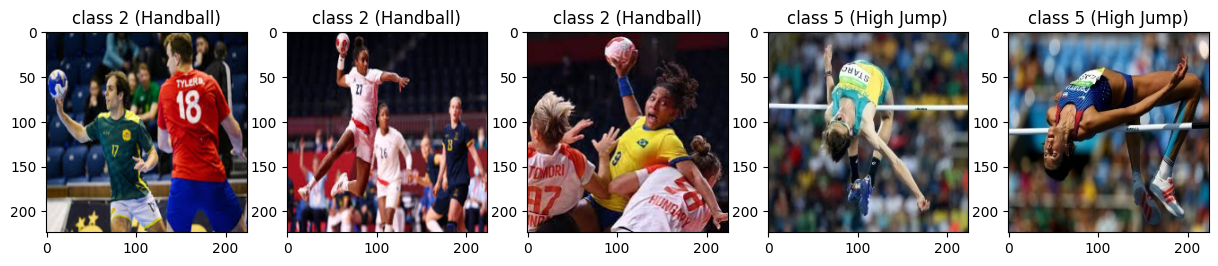

In [16]:
#visualize the first 5 image of x_train
label = ['Sepak Trakaw','Kendo','Handball','Fencing','Baseball','High Jump']
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(150 + 1 + i).set_title(f'class {y_train[i]} ({label[y_train[i]]})')
  plt.imshow(x_train[i])
plt.show()

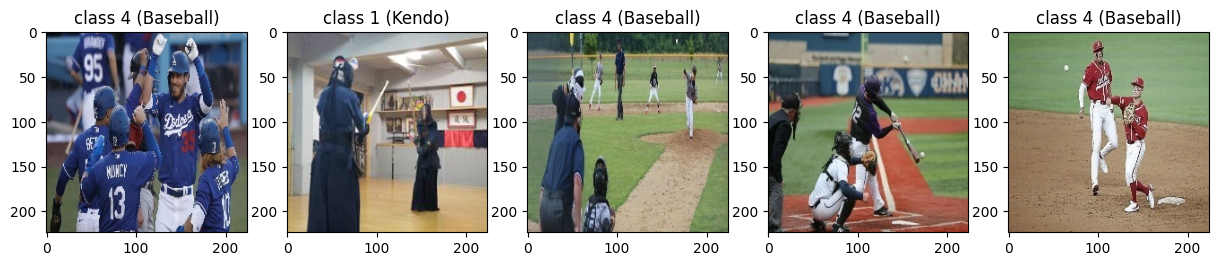

In [17]:
#visualize the first 5 image of x_test
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(150 + 1 + i).set_title(f'class {y_test[i]} ({label[y_test[i]]})')
  plt.imshow(x_test[i])
plt.show()

# Prepare Model

In [18]:
#Load ResNet50V2 model

rn_extractor = tf.keras.applications.ResNet50V2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
rn_extractor.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                        

In [19]:
#Pre-processing
x_train_rn = tf.keras.applications.resnet_v2.preprocess_input(x_train)
x_test_rn = tf.keras.applications.resnet_v2.preprocess_input(x_test)

print(x_train_rn.shape)
print(x_test_rn.shape)

(603, 224, 224, 3)
(259, 224, 224, 3)


In [20]:
# plot model
tf.keras.utils.plot_model(rn_extractor, to_file = 'rn_Model.png', show_shapes = True, show_dtype = False, show_layer_names = True, dpi = 150)

In [21]:
#Recursively freeze all layers in the model first
rn_extractor.trainable = False

for i, layer in enumerate(rn_extractor.layers):
  print(f'Layer {i}: Name = {layer.name}, Trainable = {layer.trainable}')

Layer 0: Name = input_1, Trainable = False
Layer 1: Name = conv1_pad, Trainable = False
Layer 2: Name = conv1_conv, Trainable = False
Layer 3: Name = pool1_pad, Trainable = False
Layer 4: Name = pool1_pool, Trainable = False
Layer 5: Name = conv2_block1_preact_bn, Trainable = False
Layer 6: Name = conv2_block1_preact_relu, Trainable = False
Layer 7: Name = conv2_block1_1_conv, Trainable = False
Layer 8: Name = conv2_block1_1_bn, Trainable = False
Layer 9: Name = conv2_block1_1_relu, Trainable = False
Layer 10: Name = conv2_block1_2_pad, Trainable = False
Layer 11: Name = conv2_block1_2_conv, Trainable = False
Layer 12: Name = conv2_block1_2_bn, Trainable = False
Layer 13: Name = conv2_block1_2_relu, Trainable = False
Layer 14: Name = conv2_block1_0_conv, Trainable = False
Layer 15: Name = conv2_block1_3_conv, Trainable = False
Layer 16: Name = conv2_block1_out, Trainable = False
Layer 17: Name = conv2_block2_preact_bn, Trainable = False
Layer 18: Name = conv2_block2_preact_relu, Traina

# Fine-Tune

In [22]:
# #Access a layer by 0-based index

from_lay = 186
to_lay = 186

a = rn_extractor.layers[from_lay:to_lay+1]

for i in a:
 i.trainable=True

In [23]:
#Iterate over all layers in the model
for i, layer in enumerate(rn_extractor.layers):
  print(f'Layer {i}: Name = {layer.name}, Trainable = {layer.trainable}')

Layer 0: Name = input_1, Trainable = False
Layer 1: Name = conv1_pad, Trainable = False
Layer 2: Name = conv1_conv, Trainable = False
Layer 3: Name = pool1_pad, Trainable = False
Layer 4: Name = pool1_pool, Trainable = False
Layer 5: Name = conv2_block1_preact_bn, Trainable = False
Layer 6: Name = conv2_block1_preact_relu, Trainable = False
Layer 7: Name = conv2_block1_1_conv, Trainable = False
Layer 8: Name = conv2_block1_1_bn, Trainable = False
Layer 9: Name = conv2_block1_1_relu, Trainable = False
Layer 10: Name = conv2_block1_2_pad, Trainable = False
Layer 11: Name = conv2_block1_2_conv, Trainable = False
Layer 12: Name = conv2_block1_2_bn, Trainable = False
Layer 13: Name = conv2_block1_2_relu, Trainable = False
Layer 14: Name = conv2_block1_0_conv, Trainable = False
Layer 15: Name = conv2_block1_3_conv, Trainable = False
Layer 16: Name = conv2_block1_out, Trainable = False
Layer 17: Name = conv2_block2_preact_bn, Trainable = False
Layer 18: Name = conv2_block2_preact_relu, Traina

# Data Augmentation

In [24]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        #rescale=1. / 255,
        #featurewise_center=True,
        samplewise_center=True,
        #featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        #zca_whitening=False,
        rotation_range=0,
        width_shift_range=5.0,
        height_shift_range=5.0,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.3)

train_datagen.fit(x_train_rn, seed = 2)

In [25]:
print(x_train_rn.shape)

(603, 224, 224, 3)


In [26]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        #rescale=1. / 255,
        #featurewise_center=True,
        samplewise_center=True,
        #featurewise_std_normalization=True,
        samplewise_std_normalization=True
        )

test_datagen.fit(x_test_rn, seed = 2)

===== Train batch no. 1/1 =====


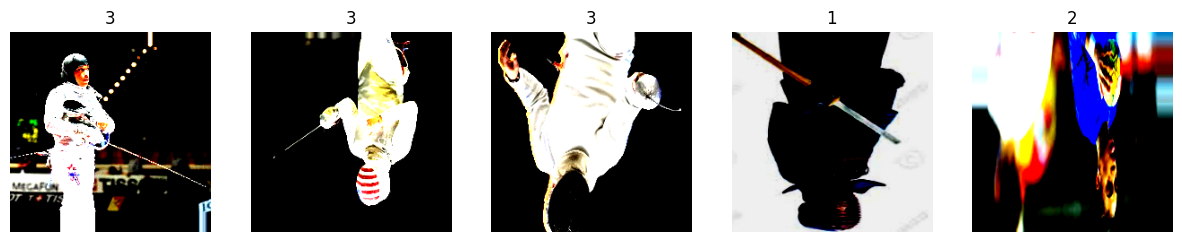

In [27]:
n_show = 1    # show 'n_show' batches of generated data (1 batch includes 5 images)

for b, (x_batch, y_batch) in enumerate( train_datagen.flow( x_train_rn, y_train, batch_size=5, subset='training' ) ):
  print( f"===== Train batch no. {b+1}/{n_show} =====" )
  plt.figure(figsize=(15,5))
  for i in range(5):
      plt.subplot(150 + 1 + i).set_title( y_batch[i] )
      plt.imshow( x_batch[i])
      plt.axis( "off" )        # remove all tick marks
  plt.show()

  if b+1 >= n_show:
    break

===== Train batch no. 1/1 =====


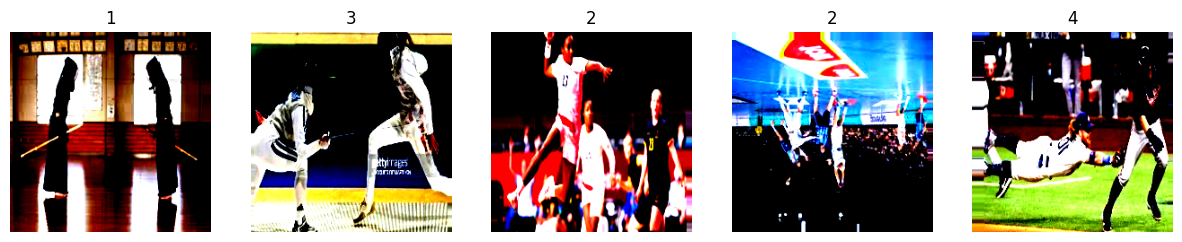

In [28]:
n_show = 1    # show 'n_show' batches of generated data (1 batch includes 5 images)

for b, (x_batch, y_batch) in enumerate( train_datagen.flow( x_train_rn, y_train, batch_size=5, subset='validation' ) ):
  print( f"===== Train batch no. {b+1}/{n_show} =====" )
  plt.figure(figsize=(15,5))
  for i in range(5):
      plt.subplot(150 + 1 + i).set_title( y_batch[i] )
      plt.imshow( x_batch[i])
      plt.axis( "off" )        # remove all tick marks
  plt.show()

  if b+1 >= n_show:
    break

===== Train batch no. 1/1 =====


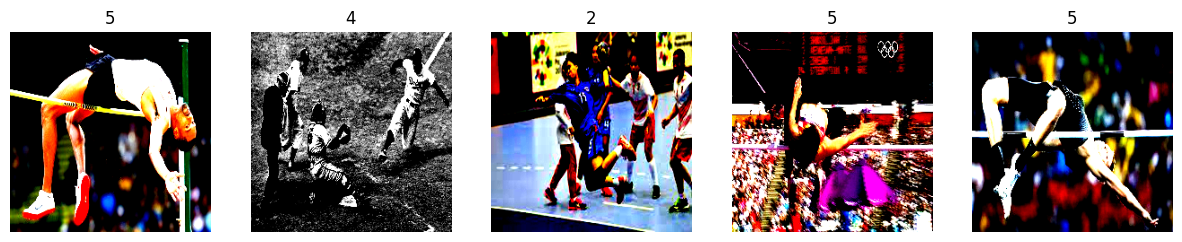

In [29]:
# n_show = 1    # show 'n_show' batches of generated data (1 batch includes 5 images)

for b, (x_batch, y_batch) in enumerate( test_datagen.flow( x_test_rn,y_test,batch_size=5 ) ):
  print( f"===== Train batch no. {b+1}/{n_show} =====" )
  plt.figure(figsize=(15,5))
  for i in range(5):
      plt.subplot(150 + 1 + i).set_title( y_batch[i] )
      plt.imshow( x_batch[i])
      plt.axis( "off" )        # remove all tick marks
  plt.show()

  if b+1 >= n_show:
    break

# Train Model

In [30]:
x = rn_extractor.output

#Add our custom layer(s) to the end of the existing model

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

new_outputs = tf.keras.layers.Dense(6, activation = 'softmax')(x)

#construct the main model

model = tf.keras.models.Model(inputs = rn_extractor.inputs, outputs = new_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [31]:
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['acc']
                     )

In [32]:
# checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}_valacc{val_acc:.2f}.hdf5"
checkpoint_filepath = "bestweights.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                save_weights_only=True,
                                                                monitor='val_acc',
                                                                mode='max',
                                                                save_best_only=True)

In [33]:
ep = 30
history = model.fit(train_datagen.flow(x_train_rn ,y_train,batch_size=128,subset='training',seed = 2),epochs = ep, verbose = 2,
                    callbacks=[model_checkpoint_callback],
                    validation_data=train_datagen.flow(x_train_rn ,y_train,subset='validation',seed=2))

Epoch 1/30
4/4 - 31s - loss: 12.2537 - acc: 0.2317 - val_loss: 2.4631 - val_acc: 0.3333 - 31s/epoch - 8s/step
Epoch 2/30
4/4 - 9s - loss: 3.3221 - acc: 0.3002 - val_loss: 1.4330 - val_acc: 0.4222 - 9s/epoch - 2s/step
Epoch 3/30
4/4 - 8s - loss: 1.8993 - acc: 0.3641 - val_loss: 1.2616 - val_acc: 0.5833 - 8s/epoch - 2s/step
Epoch 4/30
4/4 - 10s - loss: 1.4611 - acc: 0.5035 - val_loss: 1.2358 - val_acc: 0.5611 - 10s/epoch - 2s/step
Epoch 5/30
4/4 - 8s - loss: 1.2517 - acc: 0.5272 - val_loss: 1.2083 - val_acc: 0.5833 - 8s/epoch - 2s/step
Epoch 6/30
4/4 - 8s - loss: 1.0963 - acc: 0.5745 - val_loss: 0.9837 - val_acc: 0.6333 - 8s/epoch - 2s/step
Epoch 7/30
4/4 - 9s - loss: 1.0054 - acc: 0.6194 - val_loss: 0.9013 - val_acc: 0.6722 - 9s/epoch - 2s/step
Epoch 8/30
4/4 - 9s - loss: 0.8976 - acc: 0.6974 - val_loss: 0.9024 - val_acc: 0.7111 - 9s/epoch - 2s/step
Epoch 9/30
4/4 - 10s - loss: 0.8581 - acc: 0.6927 - val_loss: 0.9043 - val_acc: 0.7056 - 10s/epoch - 2s/step
Epoch 10/30
4/4 - 7s - loss: 0

# Model Evaluate

In [34]:
model.load_weights("bestweights.hdf5")
results = model.evaluate(test_datagen.flow(x_test_rn, y_test, batch_size = 128, seed = 2, shuffle = False))
print(f'{model.metrics_names}: {results}')

3/3 [==============================] - 2s 496ms/step - loss: 0.7788 - acc: 0.8185
['loss', 'acc']: [0.7788046598434448, 0.8185328245162964]


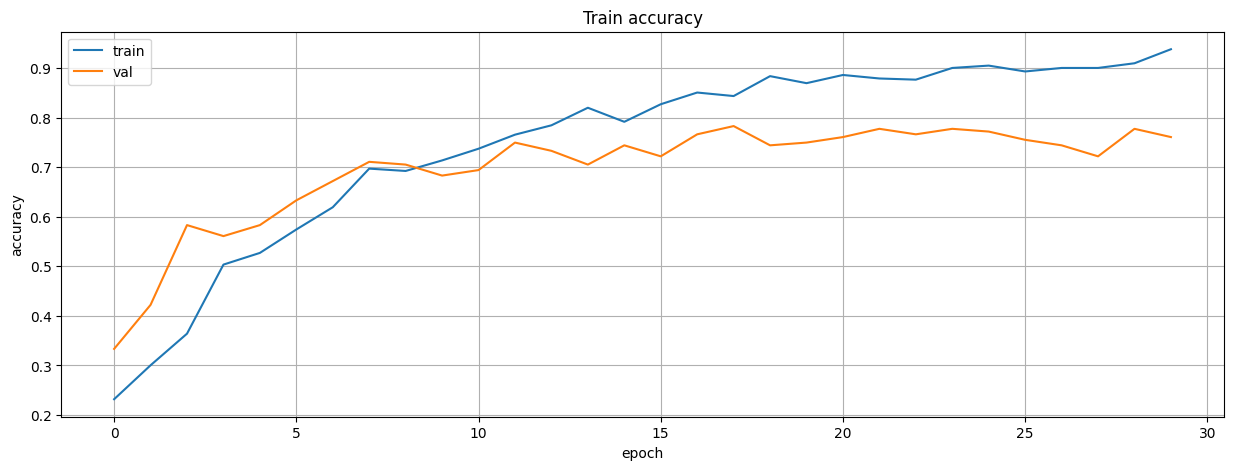

In [35]:
#Summarize history of accuracy
plt.figure(figsize = (15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.grid()
plt.show()

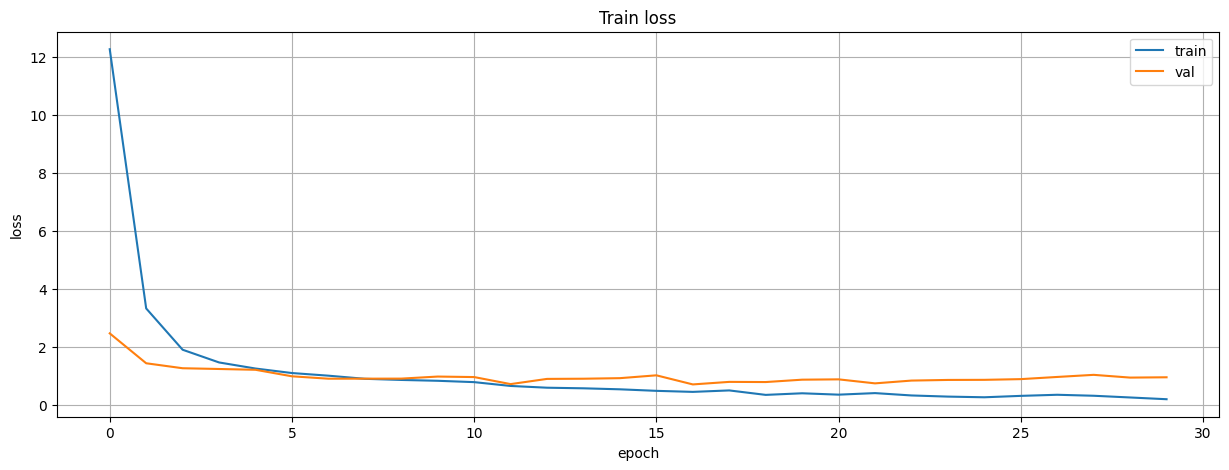

In [36]:
#Summarize history for loss
plt.figure(figsize = (15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.grid()
plt.show()

1/1 [==============================] - 0s 23ms/step


[Text(0.5, 23.52222222222222, 'Predict'),
 Text(50.72222222222221, 0.5, 'Actual')]

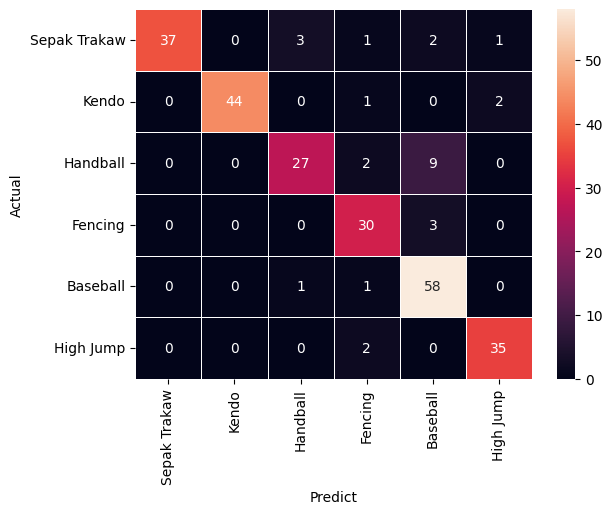

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = []
for i in range(len(x_test_rn)):
  x_input = x_test_rn[i][np.newaxis, ...]
  y_pred.append(np.argmax(model.predict(x_input)))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, xticklabels = label, yticklabels = label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')

In [38]:
# for i in range(len(x_test_rn)):
#   y_pred = model.predict(x_test_rn[i].reshape(1,224,224,3))
#   if np.argmax(y_pred) != y_test[i] and y_test[i]==0:
#     plt.imshow(x_test[i])
#     plt.title(f'x_test[{i}]: predict = {np.argmax(y_pred)} ({label[np.argmax(y_pred)]}) , actual = {y_test[i]} ({label[int(y_test[i])]})')
#     plt.show()
#   else:
#     continue

1/1 [==============================] - 0s 25ms/step


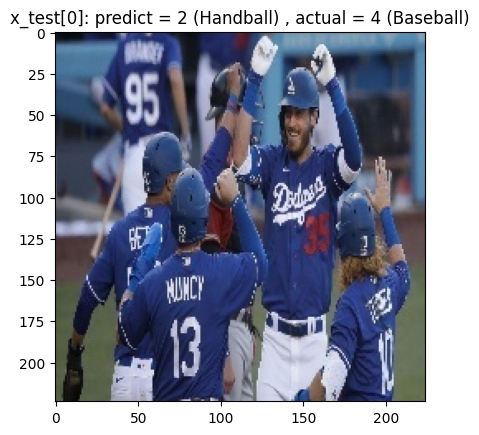

1/1 [==============================] - 0s 26ms/step


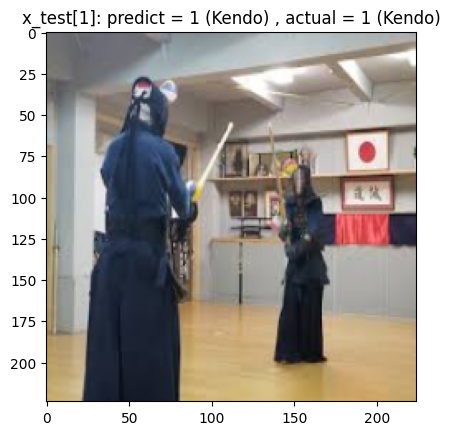

1/1 [==============================] - 0s 24ms/step


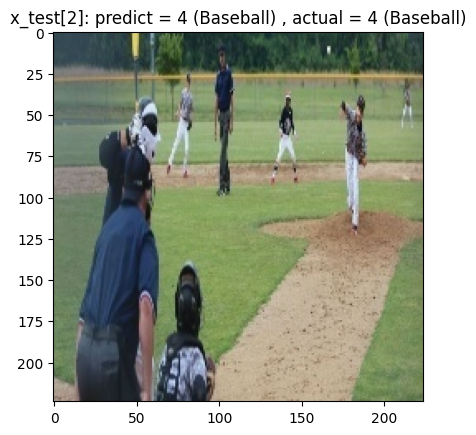

1/1 [==============================] - 0s 36ms/step


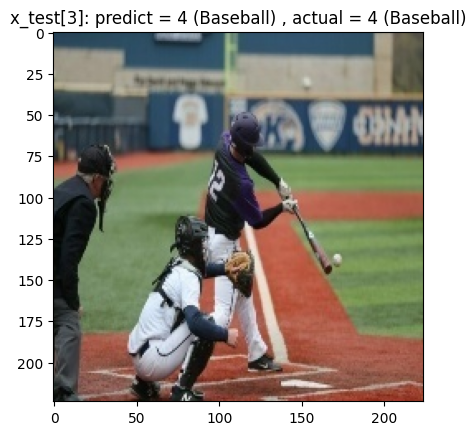

1/1 [==============================] - 0s 34ms/step


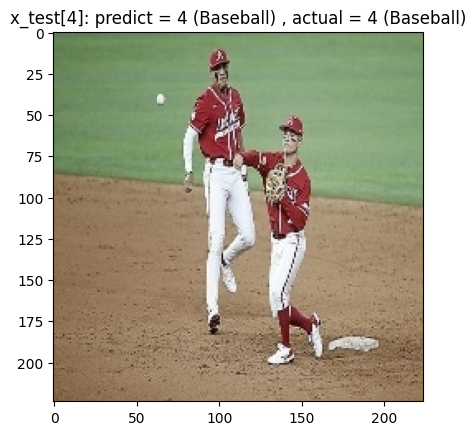

In [39]:
for i in range(5):
  y_pred = model.predict(x_test_rn[i].reshape(1,224,224,3))
  plt.imshow(x_test[i])
  plt.title(f'x_test[{i}]: predict = {np.argmax(y_pred)} ({label[np.argmax(y_pred)]}) , actual = {y_test[i]} ({label[int(y_test[i])]})')
  plt.show()

# Grad-Cam

In [40]:
img_size = (224, 224)
preprocess_input = keras.applications.resnet_v2.preprocess_input
last_conv_layer_name = "conv5_block3_3_conv"

In [41]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array)
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [42]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8):
      img = img_path

      # Rescale heatmap to a range 0-255
      heatmap = np.uint8(255 * heatmap)

      # Use jet colormap to colorize heatmap
      jet = matplotlib.colormaps["jet"]

      # Use RGB values of the colormap
      jet_colors = jet(np.arange(256))[:, :3]
      jet_heatmap = jet_colors[heatmap]

      # Create an image with RGB colorized heatmap
      jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
      jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
      jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

      # Superimpose the heatmap on original image
      superimposed_img = jet_heatmap * alpha + img
      superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

      # Save the superimposed image
      superimposed_img.save(cam_path)

      # Display Grad CAM
      display(Image(cam_path))

1/1 [==============================] - 0s 34ms/step
Predicted: Baseball | Actual: Sepak Trakaw 


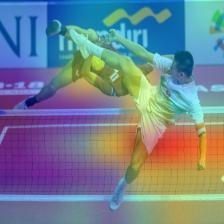

1/1 [==============================] - 0s 26ms/step
Predicted: Baseball | Actual: Baseball 


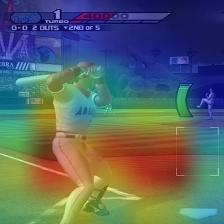

1/1 [==============================] - 0s 23ms/step
Predicted: Fencing | Actual: Fencing 


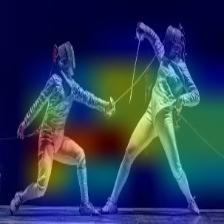

1/1 [==============================] - 0s 22ms/step
Predicted: Baseball | Actual: Baseball 


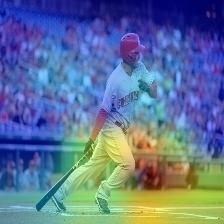

1/1 [==============================] - 0s 30ms/step
Predicted: High Jump | Actual: High Jump 


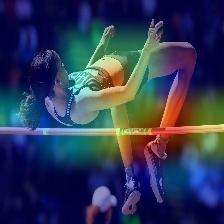

In [43]:
for i in range(5):
  c= np.random.randint(0,119)
  img_path = x_test[c]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  print(f"Predicted: {label[np.argmax(preds)]} | Actual: {label[y_test[c]]} ")
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

# Eyeball Analysis

In [44]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/sepak trakaw/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='sepak_trakaw',
                     classNo=0)

In [45]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/kendo/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='kendo',
                     classNo=1)

In [46]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/handball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='handball',
                     classNo=2)

In [47]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/fencing/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='fencing',
                     classNo=3)

In [48]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/baseball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='baseball',
                     classNo=4)

In [49]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/eyeball/high jump/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/eyeball/',
                     imgSize=(224,224),
                     outName='high_jump',
                     classNo=5)

In [50]:
x0 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_sepak_trakaw.npy')
x1 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_kendo.npy')
x2 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_handball.npy')
x3 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_fencing.npy')
x4 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_baseball.npy')
x5 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/x_high_jump.npy')

print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

(3, 224, 224, 3)
(3, 224, 224, 3)
(3, 224, 224, 3)
(3, 224, 224, 3)
(3, 224, 224, 3)
(3, 224, 224, 3)


In [51]:
y0 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_sepak_trakaw.npy')
y1 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_kendo.npy')
y2 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_handball.npy')
y3 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_fencing.npy')
y4 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_baseball.npy')
y5 = np.load('/content/DADS7202_CNN_Image_Classifier/eyeball/y_high_jump.npy')

print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(y4.shape)
print(y5.shape)

(3,)
(3,)
(3,)
(3,)
(3,)
(3,)


Class: Sepak Trakaw
1/1 [==============================] - 0s 23ms/step


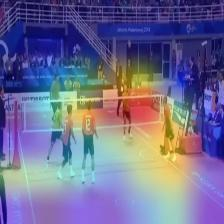


ResNetV2 Predicted: Sepak Trakaw

---------------------------
1/1 [==============================] - 0s 23ms/step


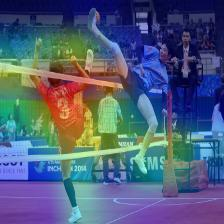


ResNetV2 Predicted: Sepak Trakaw

---------------------------
1/1 [==============================] - 0s 24ms/step


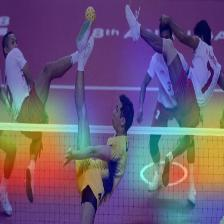


ResNetV2 Predicted: Sepak Trakaw

---------------------------


In [52]:
print('Class: Sepak Trakaw')
for i in range(3):
  img_path = x0[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')

Class: Kendo
1/1 [==============================] - 0s 22ms/step


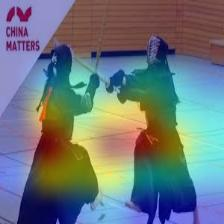


ResNetV2 Predicted: Kendo

---------------------------
1/1 [==============================] - 0s 27ms/step


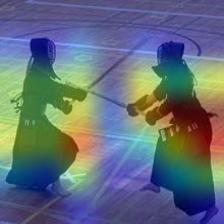


ResNetV2 Predicted: Kendo

---------------------------
1/1 [==============================] - 0s 22ms/step


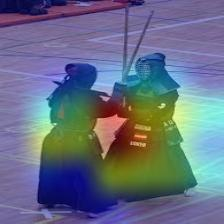


ResNetV2 Predicted: Kendo

---------------------------


In [53]:
print('Class: Kendo')
for i in range(3):
  img_path = x1[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')

Class: Handball
1/1 [==============================] - 0s 22ms/step


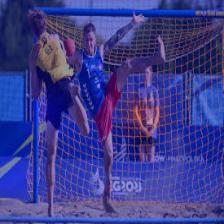


ResNetV2 Predicted: Sepak Trakaw

---------------------------
1/1 [==============================] - 0s 23ms/step


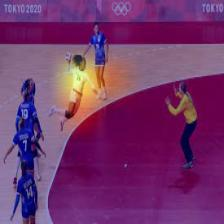


ResNetV2 Predicted: Handball

---------------------------
1/1 [==============================] - 0s 23ms/step


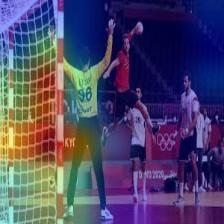


ResNetV2 Predicted: Baseball

---------------------------


In [54]:
print('Class: Handball')
for i in range(3):
  img_path = x2[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')

Class: Fencing
1/1 [==============================] - 0s 24ms/step


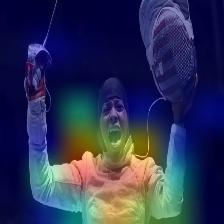


ResNetV2 Predicted: Fencing

---------------------------
1/1 [==============================] - 0s 28ms/step


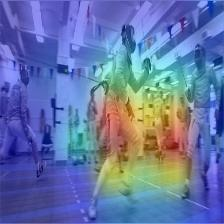


ResNetV2 Predicted: Fencing

---------------------------
1/1 [==============================] - 0s 23ms/step


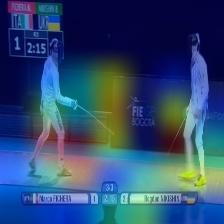


ResNetV2 Predicted: Fencing

---------------------------


In [55]:
print('Class: Fencing')
for i in range(3):
  img_path = x3[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')

Class: Baseball
1/1 [==============================] - 0s 21ms/step


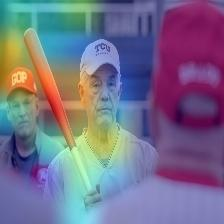


ResNetV2 Predicted: High Jump

---------------------------
1/1 [==============================] - 0s 24ms/step


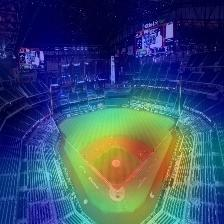


ResNetV2 Predicted: Baseball

---------------------------
1/1 [==============================] - 0s 22ms/step


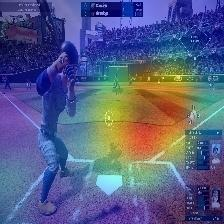


ResNetV2 Predicted: Baseball

---------------------------


In [56]:
print('Class: Baseball')
for i in range(3):
  img_path = x4[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')

Class: High Jump
1/1 [==============================] - 0s 20ms/step


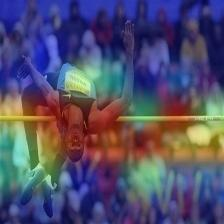


ResNetV2 Predicted: High Jump

---------------------------
1/1 [==============================] - 0s 21ms/step


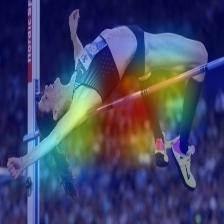


ResNetV2 Predicted: High Jump

---------------------------
1/1 [==============================] - 0s 29ms/step


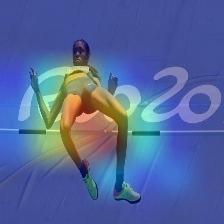


ResNetV2 Predicted: High Jump

---------------------------


In [57]:
print('Class: High Jump')
for i in range(3):
  img_path = x5[i]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)

  print(f"\nResNetV2 Predicted: {label[np.argmax(preds)]}\n")
  print('---------------------------')